# Import librairies

In [2]:
import geopandas as gpd
from shapely.geometry import Point, LineString
import folium

In [3]:
from modules.connecting_to_bdd import fetch_table_from_trafic_db
from modules.geodata import convert_to_linestring, has_close_event

# Import dataset

In [4]:
evenements_df = fetch_table_from_trafic_db('events_data')

In [5]:
trafic_df = fetch_table_from_trafic_db('trafic_routier')

In [6]:
trafic_df.head()

,id_technique,id,debit,longueur,taux_occupation,code_couleur,nom_du_troncon,etat_du_trafic,temps_de_parcours,vitesse,geo_point_2d,geometrie,shape_geo,horodatage,type_geo,coordinates_geo
0,772-20250218T205200,772,120,410,1.2,3,Vannes I9,Fluide,62,24,"{47.23414730688424,-1.5808786419612229}","{{-1.583123434893785,47.235185973808406},{-1.5...",LineString,2025-02-18 20:52:00,Point,"{-1.5808786419612229,47.23414730688424}"
1,158-20250218T205200,158,300,364,3.7,3,Le Lasseur P2,Fluide,63,21,"{47.23083661767159,-1.5704468983375661}","{{-1.568589501648445,47.23188191655151},{-1.57...",LineString,2025-02-18 20:52:00,Point,"{-1.5704468983375661,47.23083661767159}"
2,497-20250218T205200,497,180,224,2.0,3,Lauriol I4,Fluide,37,22,"{47.23531301184315,-1.5635261418937887}","{{-1.563539784805616,47.236320687488636},{-1.5...",LineString,2025-02-18 20:52:00,Point,"{-1.5635261418937887,47.23531301184315}"
3,5444-20250218T205200,5444,240,177,2.9,3,Pasteur P1,Fluide,40,16,"{47.21255561611825,-1.579953397082114}","{{-1.581033846171769,47.21286509290865},{-1.57...",LineString,2025-02-18 20:52:00,Point,"{-1.579953397082114,47.21255561611825}"
4,5053-20250218T205200,5053,60,224,0.8,3,Barbusse P2,Fluide,44,18,"{47.22705355840811,-1.5524880999813486}","{{-1.551553912867712,47.22760386550291},{-1.55...",LineString,2025-02-18 20:52:00,Point,"{-1.5524880999813486,47.22705355840811}"


In [7]:
trafic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1554761 entries, 0 to 1554760
Data columns (total 16 columns):
 #   Column             Non-Null Count    Dtype         
---  ------             --------------    -----         
 0   id_technique       1554761 non-null  object        
 1   id                 1554761 non-null  int64         
 2   debit              1554761 non-null  int64         
 3   longueur           1554761 non-null  int64         
 4   taux_occupation    1554761 non-null  float64       
 5   code_couleur       1554761 non-null  int64         
 6   nom_du_troncon     1554761 non-null  object        
 7   etat_du_trafic     1554761 non-null  object        
 8   temps_de_parcours  1554761 non-null  int64         
 9   vitesse            1554761 non-null  int64         
 10  geo_point_2d       1554761 non-null  object        
 11  geometrie          1554761 non-null  object        
 12  shape_geo          1554761 non-null  object        
 13  horodatage         1554761 

In [8]:
evenements_df.head()

,name,description,startdate,enddate,location_name,address,city,postalcode,location_uid,coordinates_geo,event_id
0,Football : FC Nantes / Paris SG,Match - 29e journée - Ligue 1 - Saison 2024/2025,2025-04-13 17:00:00,2025-04-13 19:00:00,Stade de la Beaujoire Louis Fonteneau,"330 Route de Saint Joseph, Nantes",Nantes,44300,95545941,"{-1.527812, 47.25867}",926afe1f-3bcc-4cc1-a2bd-3597dd36d86d
1,Football : FC Nantes / Toulouse FC,Match - 31e journée - Ligue 1 - Saison 2024/2025,2025-04-27 17:00:00,2025-04-27 19:00:00,Stade de la Beaujoire Louis Fonteneau,"330 Route de Saint Joseph, Nantes",Nantes,44300,95545941,"{-1.527812, 47.25867}",19bb79da-1c20-41a2-a53d-c45bcae5a0ce
2,Blandine Lehout - La Vie de ta mère,Blandine Lehout - La Vie de ta mère,2025-10-01 20:00:00,2025-10-01 22:30:00,Cité internationale des Congrès,"5 Rue de Valmy, Nantes",Nantes,44000,47538434,"{-1.544058, 47.213314}",da51b672-08bc-49e6-bcd6-516090c48e77
3,Alexandre Kominek - Bâtard sensible,Alexandre Kominek - Bâtard sensible,2025-03-01 20:30:00,2025-03-01 22:00:00,Cité internationale des Congrès,"5 Rue de Valmy, Nantes",Nantes,44000,47538434,"{-1.544058, 47.213314}",209c09e0-8d45-4429-ab15-7e1bf979f9c1
4,Comédie Le Clan des divorcées,Comédie Le Clan des divorcées,2025-03-02 15:00:00,2025-03-02 16:40:00,Cité internationale des Congrès,"5 Rue de Valmy, Nantes",Nantes,44000,47538434,"{-1.544058, 47.213314}",2eae861f-2e7f-4ff4-8c77-8f72b719fb23


# Jointure

In [9]:
import geopandas as gpd
from shapely.geometry import LineString

# Fonction pour convertir les données de format semi-WKT en objets LineString
def convert_to_linestring(line_str):
    # Retirer les crochets doubles et extraire les coordonnées
    coords_str = line_str.strip("{}").split("},{")
    # Convertir les coordonnées en tuples (longitude, latitude)
    coords = [tuple(map(float, coord.split(","))) for coord in coords_str]
    # Créer un objet LineString avec Shapely
    return LineString(coords)

# Appliquer la conversion à la colonne de données
trafic_df["geometry"] = trafic_df["geometrie"].apply(convert_to_linestring)

trafic_df_gdf = gpd.GeoDataFrame(trafic_df, geometry="geometry", crs="EPSG:3857")


In [10]:
# Fonction pour transformer les coordonnées en objets Point
def convert_to_point(coord_str):
    # Retirer les accolades et séparer les coordonnées
    coords = coord_str.strip("{}").split(", ")
    # Convertir les coordonnées en float (longitude, latitude)
    longitude, latitude = map(float, coords)
    # Créer un objet Point
    return Point(longitude, latitude)

# Appliquer cette fonction à la colonne "coordinates_geo"
evenements_df["geometry"] = evenements_df["coordinates_geo"].apply(convert_to_point)

# Convertir en GeoDataFrame
evenements_gdf = gpd.GeoDataFrame(evenements_df, geometry="geometry", crs="EPSG:3857")


In [11]:
evenements_gdf_unique = evenements_gdf.drop_duplicates(subset=["coordinates_geo"])

In [17]:
trafic_gdf_unique = trafic_df_gdf.drop_duplicates(subset=["geometrie"])

In [18]:
len(evenements_gdf_unique)

7

In [19]:
len(trafic_gdf_unique)

849

In [20]:
import geopandas as gpd
import numpy as np

# Reprojection des GeoDataFrames en EPSG:3857 pour avoir les distances en mètres
trafic_gdf_unique = trafic_gdf_unique.to_crs(epsg=3857)
evenements_gdf_unique = evenements_gdf_unique.to_crs(epsg=3857)

# Créer un buffer autour de chaque tronçon de route (500 mètres)
trafic_gdf_unique["buffered_geometry"] = trafic_gdf_unique["geometry"].buffer(500)

# Jointure spatiale pour vérifier si un événement tombe à l'intérieur d'un buffer
df_join = gpd.sjoin_nearest(evenements_gdf_unique, trafic_gdf_unique, how="left", distance_col="distance")

# Ajouter une colonne pour indiquer si l'événement est à moins de 500 mètres d'un tronçon
df_join["has_event_near_troncon"] = np.where(df_join["distance"] <= 500, 1, 0)

# Ajouter le nom de l'événement si l'événement est proche d'un tronçon
df_join["event_location_name"] = df_join["location_name"].where(df_join["has_event_near_troncon"] == 1, np.nan)

# Afficher le résultat
result = df_join[["id_technique", "nom_du_troncon", "has_event_near_troncon", "event_location_name", "distance"]]


In [21]:
result

,id_technique,nom_du_troncon,has_event_near_troncon,event_location_name,distance
0,5098-20250218T205200,St Joseph P09,1,Stade de la Beaujoire Louis Fonteneau,0.000206
2,319-20250218T205200,Bonduelle I1,1,Cité internationale des Congrès,0.000392
48,5208-20250218T205200,Viviani P2,1,Palais des Sports Beaulieu,0.001161
49,97-20250218T205200,St Joseph I04,1,Parc des Expositions de la Beaujoire,0.000373
50,5139-20250218T205200,Bureau P,1,STEREOLUX,0.000142
54,5524-20250218T205200,Paul I1,1,Zénith de Nantes Métropole,0.003865
100,5524-20250218T205200,Paul I1,1,Zénith de Nantes Métropole,0.007401


In [42]:
# Reprojection des GeoDataFrames vers EPSG:2154 (pour la France)
trafic_gdf_unique = trafic_gdf_unique.to_crs(epsg=2154)
evenements_gdf_unique = evenements_gdf_unique.to_crs(epsg=2154)

# Créer un buffer autour de chaque tronçon de route (500 mètres)
trafic_gdf_unique["buffered_geometry"] = trafic_gdf_unique["geometry"].buffer(500)

# Jointure spatiale pour vérifier si un événement tombe à l'intérieur d'un buffer
df_join = gpd.sjoin_nearest(evenements_gdf_unique, trafic_gdf_unique, how="left", distance_col="distance")

# Ajouter une colonne pour indiquer si l'événement est à moins de 500 mètres d'un tronçon
df_join["has_event_near_troncon"] = np.where(df_join["distance"] <= 500, 1, 0)

# Ajouter le nom de l'événement si l'événement est proche d'un tronçon
df_join["event_location_name"] = df_join["location_name"].where(df_join["has_event_near_troncon"] == 1, np.nan)

df_join["distance_meters"] = df_join["distance"] * 100  # Conversion de kilomètres à mètres


# Afficher le résultat
result_ = df_join[["id_technique", "nom_du_troncon", "has_event_near_troncon", "event_location_name", "distance_meters"]]


In [43]:
result_

,id_technique,nom_du_troncon,has_event_near_troncon,event_location_name,distance_meters
0,5098-20250218T205200,St Joseph P09,1,Stade de la Beaujoire Louis Fonteneau,0.027497
2,319-20250218T205200,Bonduelle I1,1,Cité internationale des Congrès,0.052232
48,5208-20250218T205200,Viviani P2,1,Palais des Sports Beaulieu,0.154637
49,97-20250218T205200,St Joseph I04,1,Parc des Expositions de la Beaujoire,0.049651
50,5139-20250218T205200,Bureau P,1,STEREOLUX,0.018969
54,5524-20250218T205200,Paul I1,1,Zénith de Nantes Métropole,0.516479
100,5524-20250218T205200,Paul I1,1,Zénith de Nantes Métropole,0.987382


In [67]:
import geopandas as gpd
import numpy as np

# Reprojection des GeoDataFrames vers EPSG:2154 (Lambert 93 - unités en mètres)
trafic_gdf_unique = trafic_gdf_unique.to_crs(epsg=2154)
evenements_gdf_unique = evenements_gdf_unique.to_crs(epsg=2154)

# Créer un buffer autour de chaque tronçon de route (500 mètres)
trafic_gdf_unique["buffered_geometry"] = trafic_gdf_unique["geometry"].buffer(500)

# Initialiser les colonnes pour chaque tronçon
trafic_gdf_unique["has_event_near_troncon"] = 0
trafic_gdf_unique["event_location_name"] = np.nan

# Parcours de chaque tronçon pour vérifier si un événement est à moins de 500 mètres
for index, row in trafic_gdf_unique.iterrows():
    # Obtenir le buffer du tronçon 
    troncon_buffer = row["buffered_geometry"]
    
    # Filtrer les événements qui sont à l'intérieur du buffer
    events_nearby = evenements_gdf_unique[evenements_gdf_unique.intersects(troncon_buffer)]
    
    # Vérification si des événements sont proches
    if not events_nearby.empty:
        # Calcul des distances réelles pour chaque événement trouvé à l'intérieur du buffer
        distances = events_nearby.apply(lambda x: x.geometry.distance(row["geometry"]), axis=1)
        distances_in_meters = distances * 100        
        
        # Si des événements sont à moins de 500 mètres, mettre 1 dans la colonne has_event_near_troncon
        closest_event_distance = distances_in_meters.min()  # Distance du plus proche événement
        
        if closest_event_distance <= 0.4:  # Vérification si la distance est bien <= 500m
            trafic_gdf_unique.at[index, "has_event_near_troncon"] = 1
            # Trouver le nom de l'événement le plus proche
            closest_event_idx = distances_in_meters.idxmin()  # L'index de l'événement le plus proche
            trafic_gdf_unique.at[index, "event_location_name"] = events_nearby.loc[closest_event_idx, "location_name"]
            trafic_gdf_unique.at[index, "event_location_id"] = events_nearby.loc[closest_event_idx, "location_uid"]
        else:
            trafic_gdf_unique.at[index, "has_event_near_troncon"] = 0
            trafic_gdf_unique.at[index, "event_location_name"] = np.nan
    else:
        trafic_gdf_unique.at[index, "has_event_near_troncon"] = 0
        trafic_gdf_unique.at[index, "event_location_name"] = np.nan

# Affichage du résultat final
result_ = trafic_gdf_unique[["id_technique", "nom_du_troncon", "has_event_near_troncon", "event_location_name"]]
print(result_)


<ipython-input-67-f80fe87858b2>:36: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Parc des Expositions de la Beaujoire' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  trafic_gdf_unique.at[index, "event_location_name"] = events_nearby.loc[closest_event_idx, "location_name"]


               id_technique       nom_du_troncon  has_event_near_troncon  \
0       772-20250218T205200            Vannes I9                       0   
1       158-20250218T205200        Le Lasseur P2                       0   
2       497-20250218T205200           Lauriol I4                       0   
3      5444-20250218T205200           Pasteur P1                       0   
4      5053-20250218T205200          Barbusse P2                       0   
..                      ...                  ...                     ...   
844     197-20250218T205200          Massacre I2                       0   
845  100076-20250218T205200              VEIL I1                       0   
846  100083-20250218T205200            HALIMI P3                       0   
847   10074-20250218T205200               VM 723                       0   
848  100087-20250218T205200  Estuaire vers Ouest                       1   

    event_location_name  
0                   NaN  
1                   NaN  
2        

In [68]:
trafic_gdf_unique.loc[trafic_gdf_unique['has_event_near_troncon'] == 1]

,id_technique,id,debit,longueur,taux_occupation,code_couleur,nom_du_troncon,etat_du_trafic,temps_de_parcours,vitesse,...,geometrie,shape_geo,horodatage,type_geo,coordinates_geo,geometry,buffered_geometry,has_event_near_troncon,event_location_name,event_location_id
27,97-20250218T205200,97,120,308,2.5,3,St Joseph I04,Fluide,71,16,...,"{{-1.528032525336374,47.25900864900125},{-1.52...",LineString,2025-02-18 20:52:00,Point,"{-1.5286272947095954,47.259843249830965}","LINESTRING (253531.473 909901.735, 253531.472 ...","POLYGON ((253439.782 909410.215, 253391.445 90...",1,Parc des Expositions de la Beaujoire,34310089
142,5795-20250218T205200,5795,660,235,12.0,3,Carnot P1,Fluide,55,15,...,"{{-1.547810509950369,47.215396198913176},{-1.5...",LineString,2025-02-18 20:52:00,Point,"{-1.5470057319876678,47.215426564353535}","LINESTRING (253531.444 909901.679, 253531.444 ...","POLYGON ((253040.466 909807.123, 253033.858 90...",1,Cité internationale des Congrès,47538434
171,5208-20250218T205200,5208,60,260,0.8,3,Viviani P2,Fluide,47,20,...,"{{-1.536518475502293,47.20810953583639},{-1.53...",LineString,2025-02-18 20:52:00,Point,"{-1.5377160664644653,47.207243356068666}","LINESTRING (253531.459 909901.668, 253531.457 ...","POLYGON ((253233.771 910302.652, 253233.417 91...",1,Palais des Sports Beaulieu,57179132
172,150-20250218T205200,150,60,284,0.4,3,Brandt I,Fluide,51,20,...,"{{-1.535163140374426,47.210619165863704},{-1.5...",LineString,2025-02-18 20:52:00,Point,"{-1.535763556245686,47.21183257767335}","LINESTRING (253531.461 909901.672, 253531.46 9...","POLYGON ((253075.77 909695.891, 253057.794 909...",1,Palais des Sports Beaulieu,57179132
192,7120-20250218T205200,7120,0,197,0.0,2,Bertin P,Indéterminé,29,24,...,"{{-1.535120680083057,47.210409061290875},{-1.5...",LineString,2025-02-18 20:52:00,Point,"{-1.5338410458731162,47.210529035836885}","LINESTRING (253531.461 909901.671, 253531.462 ...","POLYGON ((253473.228 910397.668, 253473.159 91...",1,Palais des Sports Beaulieu,57179132
193,2120-20250218T205200,2120,0,217,0.0,2,Bertin I,Indéterminé,22,36,...,"{{-1.535163289344907,47.21062122457745},{-1.53...",LineString,2025-02-18 20:52:00,Point,"{-1.5337429445774642,47.210739493624445}","LINESTRING (253531.461 909901.672, 253531.462 ...","POLYGON ((253483.85 910399.098, 253483.821 910...",1,Palais des Sports Beaulieu,57179132
251,98-20250218T205200,98,180,459,0.8,3,St Joseph I05,Fluide,77,21,...,"{{-1.528067940161778,47.25891150128339},{-1.52...",LineString,2025-02-18 20:52:00,Point,"{-1.5293465616679585,47.25709429958591}","LINESTRING (253531.473 909901.735, 253531.472 ...","POLYGON ((253040.531 909993.401, 253039.383 90...",1,Stade de la Beaujoire Louis Fonteneau,95545941
279,587-20250218T205200,587,60,92,0.8,3,Rieux P,Fluide,18,18,...,"{{-1.54371581085575,47.21172553229082},{-1.544...",LineString,2025-02-18 20:52:00,Point,"{-1.5442467662431325,47.21151933551849}","LINESTRING (253531.45 909901.673, 253531.448 9...","POLYGON ((253693.549 909428.679, 253646.407 90...",1,Cité internationale des Congrès,47538434
317,139-20250218T205200,139,0,253,0.0,2,Bureau I,Indéterminé,-1,-1,...,"{{-1.564025228891292,47.20664611624864},{-1.56...",LineString,2025-02-18 20:52:00,Point,"{-1.5631283610338058,47.2056838034638}","LINESTRING (253531.422 909901.668, 253531.425 ...","POLYGON ((253908.784 910229.689, 253939.119 91...",1,STEREOLUX,21547859
319,797-20250218T205200,797,420,307,5.8,3,Briand I1,Fluide,64,17,...,"{{-1.541289456847836,47.20942154087257},{-1.53...",LineString,2025-02-18 20:52:00,Point,"{-1.54028759566799,47.20821701263509}","LINESTRING (253531.453 909901.67, 253531.455 9...","POLYGON ((253926.724 910207.875, 253954.834 91...",1,Palais des Sports Beaulieu,57179132


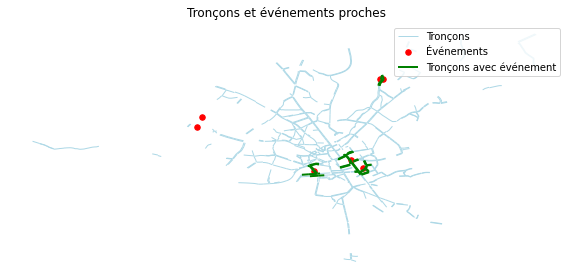

In [62]:
import matplotlib.pyplot as plt

# On crée la figure et les axes
fig, ax = plt.subplots(figsize=(10, 10))

# 1. Afficher les tronçons (en bleu par défaut)
trafic_gdf_unique.plot(ax=ax, color='lightblue', linewidth=1, label="Tronçons")

# 2. Afficher les événements associés (en rouge)
evenements_gdf_unique.plot(ax=ax, color='red', markersize=30, label="Événements")

# 3. Si tu veux seulement afficher les événements qui sont proches (has_event_near_troncon = 1)
matched_troncons = trafic_gdf_unique[trafic_gdf_unique["has_event_near_troncon"] == 1]
matched_troncons.plot(ax=ax, color='green', linewidth=2, label="Tronçons avec événement")

# Ajouter une légende
plt.legend()

# Ajouter un titre
plt.title("Tronçons et événements proches")

# Supprimer les axes pour plus de clarté
plt.axis("off")

# Afficher la carte
plt.show()


In [39]:
trafic_gdf_unique = trafic_gdf_unique.to_crs(epsg=2154)
evenements_gdf_unique = evenements_gdf_unique.to_crs(epsg=2154)

# Calcul des distances après reprojection dans EPSG:2154 (en mètres)
df_join_lambert = gpd.sjoin_nearest(trafic_gdf_unique, evenements_gdf_unique, how="left", distance_col="distance_lambert")

# Afficher les résultats avec les distances en mètres
print(df_join_lambert[['id_technique', 'nom_du_troncon', 'location_name', 'distance_lambert']])


               id_technique       nom_du_troncon  \
0       772-20250218T205200            Vannes I9   
1       158-20250218T205200        Le Lasseur P2   
2       497-20250218T205200           Lauriol I4   
3      5444-20250218T205200           Pasteur P1   
4      5053-20250218T205200          Barbusse P2   
..                      ...                  ...   
844     197-20250218T205200          Massacre I2   
845  100076-20250218T205200              VEIL I1   
846  100083-20250218T205200            HALIMI P3   
847   10074-20250218T205200               VM 723   
848  100087-20250218T205200  Estuaire vers Ouest   

                             location_name  distance_lambert  
0                                STEREOLUX          0.040475  
1                                STEREOLUX          0.033005  
2                                STEREOLUX          0.037190  
3                                STEREOLUX          0.021122  
4          Cité internationale des Congrès          0.020904

In [41]:
# Filtrer les distances inférieures à 1 mètre pour vérifier les résultats
df_nearby_events = df_join_lambert[df_join_lambert['distance_lambert'] < 1]

# Affichage de ces distances
print(df_nearby_events[['id_technique', 'nom_du_troncon', 'location_name', 'distance_lambert']])


               id_technique       nom_du_troncon  \
0       772-20250218T205200            Vannes I9   
1       158-20250218T205200        Le Lasseur P2   
2       497-20250218T205200           Lauriol I4   
3      5444-20250218T205200           Pasteur P1   
4      5053-20250218T205200          Barbusse P2   
..                      ...                  ...   
844     197-20250218T205200          Massacre I2   
845  100076-20250218T205200              VEIL I1   
846  100083-20250218T205200            HALIMI P3   
847   10074-20250218T205200               VM 723   
848  100087-20250218T205200  Estuaire vers Ouest   

                             location_name  distance_lambert  
0                                STEREOLUX          0.040475  
1                                STEREOLUX          0.033005  
2                                STEREOLUX          0.037190  
3                                STEREOLUX          0.021122  
4          Cité internationale des Congrès          0.020904

In [ ]:
import geopandas
# Si tu as un Point avec les coordonnées inversées (latitude, longitude)
evenements_df["geometry"] = evenements_df["coordinates_geo"].apply(
    lambda x: Point(eval(x)[1], eval(x)[0])  # Inverser les coordonnées
)


TypeError: 'set' object is not subscriptable

In [ ]:
# Suppression des doublons dans 'evenements_gdf' (lieux uniques)
evenements_gdf_unique = evenements_gdf.drop_duplicates(subset=["coordinates_geo"])
len(evenements_gdf_unique)

7

In [ ]:
# Suppression des doublons dans 'trafic_gdf' (tronçons uniques)
trafic_gdf_unique = trafic_gdf.drop_duplicates(subset=["geometrie_linestring"])
len(trafic_gdf_unique)

849

In [ ]:
print(trafic_gdf_unique.crs)
print(evenements_gdf_unique.crs)


EPSG:4326
EPSG:4326


In [ ]:
import geopandas as gpd
import pandas as pd
from shapely import wkt
import shapely
import numpy as np

# Reprojection des GeoDataFrame pour travailler avec des unités en mètres (EPSG:3857)
trafic_gdf_unique = trafic_gdf_unique.to_crs(epsg=3857)
evenements_gdf_unique = evenements_gdf_unique.to_crs(epsg=3857)

# Conversion des géométries en utilisant shapely (s'il y a des chaînes WKT dans les colonnes)
# Si les géométries sont déjà sous forme de shapely, cette étape n'est pas nécessaire
# Pour les événements : les géométries sont des points
evenements_gdf_unique["geometry"] = evenements_gdf_unique["geometrie_point"].apply(lambda x: shapely.wkt.dumps(x))

# Pour les tronçons : les géométries sont des LineString
trafic_gdf_unique["geometry"] = trafic_gdf_unique["geometrie_linestring"].apply(lambda x: shapely.wkt.dumps(x))

# Réajuster le CRS des deux GeoDataFrame pour qu'ils aient le même système de projection
evenements_gdf_unique = evenements_gdf_unique.to_crs(trafic_gdf_unique.crs)

# Utilisation de sjoin_nearest pour joindre les points d'événements avec le tronçon le plus proche
df_n = gpd.sjoin_nearest(trafic_gdf_unique, evenements_gdf_unique, how="left", distance_col="distance")

# Ajouter la colonne 'has_event_place_nearby' pour indiquer s'il y a un événement à proximité
df_n["has_event_place_nearby"] = df_n["distance"].apply(lambda x: 1 if x <= 500 else 0)

# Ajouter la colonne 'event_location_name' pour afficher le nom de l'événement s'il est à proximité
df_n["event_location_name"] = df_n["location_name"].where(df_n["has_event_place_nearby"] == 1, np.nan)

# Affichage du résultat
print(df_n[["id_technique", "nom_du_troncon", "has_event_place_nearby", "event_location_name", "distance"]])


               id_technique       nom_du_troncon  has_event_place_nearby  \
0       772-20250218T205200            Vannes I9                       0   
1       158-20250218T205200        Le Lasseur P2                       0   
2       497-20250218T205200           Lauriol I4                       0   
3      5444-20250218T205200           Pasteur P1                       0   
4      5053-20250218T205200          Barbusse P2                       0   
..                      ...                  ...                     ...   
844     197-20250218T205200          Massacre I2                       0   
845  100076-20250218T205200              VEIL I1                       0   
846  100083-20250218T205200            HALIMI P3                       0   
847   10074-20250218T205200               VM 723                       0   
848  100087-20250218T205200  Estuaire vers Ouest                       0   

    event_location_name      distance  
0                   NaN  8.205796e+06  
1      

In [ ]:
df_n.loc[df_n['has_event_place_nearby']==1]

,id_technique,id,debit,longueur,taux_occupation,code_couleur,nom_du_troncon,etat_du_trafic,temps_de_parcours,vitesse,...,address,city,postalcode,location_uid,coordinates_geo_right,event_id,geometry_right,distance,has_event_place_nearby,event_location_name
